In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 一、合併日資料與每季成分股資料 (df_D ,df_final)

In [2]:
# 匯入第一部分完成的資料 內容包含每半年審核日所選出的個股
# 欄位有'Data_End_Date', 'Review_Date', 'Active_Date', 'Code', 'New_Remain_Del'(判斷新增、維持在成分股、刪除),'SmartBeta'
# 為避免讀取時出現亂碼，在此也添加上 encoding="utf_8_sig" 參數來改編讀取時的編碼
df_final=pd.read_csv('df_final.csv',engine='python',encoding="utf_8_sig")

In [3]:
# check point
df_final

,Data_End_Date,Review_Date,Active_Date,Code,New_Remain_Del,Dividend,close_price,年月日,證券代碼,SmartBeta
0,20121130,20121211,20121219,1304,0,1.00,22.65,20121130.0,1304.0,2.460558
1,20121130,20121211,20121219,1476,0,3.00,96.00,20121130.0,1476.0,2.345336
2,20121130,20121211,20121219,1507,0,2.20,54.60,20121130.0,1507.0,2.910732
3,20121130,20121211,20121219,1710,0,2.00,36.15,20121130.0,1710.0,2.712090
4,20121130,20121211,20121219,1717,0,1.00,25.50,20121130.0,1717.0,2.455143
5,20121130,20121211,20121219,2006,0,1.60,29.90,20121130.0,2006.0,2.672962
6,20121130,20121211,20121219,2015,0,3.00,49.20,20121130.0,2015.0,2.141609
7,20121130,20121211,20121219,2356,0,0.30,10.95,20121130.0,2356.0,2.932872
8,20121130,20121211,20121219,2362,0,1.50,38.10,20121130.0,2362.0,2.789897
9,20121130,20121211,20121219,2379,0,2.30,58.60,20121130.0,2379.0,2.362958


In [4]:
df_final=df_final.sort_values(['Data_End_Date','Code']).reset_index(drop=True)
#計算每期個股權重
df_final['Weight'] = df_final.groupby('Data_End_Date')['SmartBeta'].apply(lambda x : x/x.sum())

df_final = df_final.sort_values(['Code','Data_End_Date']).reset_index(drop=True)
df_final['Weight_t-1'] = df_final.groupby('Code')['Weight'].shift(1) 

In [5]:
# 刪除部分 rows，只保留需要的項目
# ['Data_End_Date', 'Review_Date', 'Active_Date', 'Code', 'New_Remain_Del','SmartBeta', 'Weight', 'Weight_t-1', 'Dividend']
df_final = df_final[ ['Data_End_Date', 'Review_Date', 'Active_Date', 'Code', 'New_Remain_Del','SmartBeta', 'Weight', 'Weight_t-1', 'Dividend'] ]

In [6]:
# check point
df_final

,Data_End_Date,Review_Date,Active_Date,Code,New_Remain_Del,SmartBeta,Weight,Weight_t-1,Dividend
0,20171130,20171211,20171219,1102,0,1.955322,0.025422,NaN,0.90
1,20180531,20180611,20180620,1102,2,NaN,NaN,0.025422,0.00
2,20130531,20130611,20130620,1201,0,2.045122,0.023920,NaN,0.60
3,20131129,20131210,20131218,1201,2,NaN,NaN,0.023920,0.00
4,20180531,20180611,20180620,1210,0,3.917880,0.044172,NaN,2.00
5,20181130,20181211,20181219,1210,1,2.146779,0.026819,0.044172,2.00
6,20130531,20130611,20130620,1227,0,2.585468,0.030240,NaN,2.00
7,20131129,20131210,20131218,1227,1,2.019709,0.024295,0.030240,2.00
8,20140530,20140611,20140619,1227,2,NaN,NaN,0.024295,0.00
9,20180531,20180611,20180620,1227,0,2.336441,0.026342,NaN,2.00


In [7]:
# checkpoint
# 檢查單一標的在不同狀況時的數據是否正常
df_final[df_final.Code==8454]

,Data_End_Date,Review_Date,Active_Date,Code,New_Remain_Del,SmartBeta,Weight,Weight_t-1,Dividend
505,20160531,20160608,20160620,8454,0,2.744371,0.031655,NaN,7.0
506,20161130,20161209,20161219,8454,1,2.617460,0.031270,0.031655,7.0
507,20170531,20170608,20170616,8454,2,NaN,NaN,0.031270,0.0
508,20171130,20171211,20171219,8454,0,2.078346,0.027022,NaN,8.0
509,20180531,20180611,20180620,8454,2,NaN,NaN,0.027022,0.0


In [8]:
#匯入個股日資料
df_D=pd.read_csv('./Data/Daily_Data.txt',sep='\t',engine='python')
df_D = df_D.sort_values(['證券代碼','年月日']).reset_index(drop='True')
df_D['市值'] = df_D['收盤價'] * df_D['流通在外股數']*1000

In [9]:
#在日資料中新增一個欄位用來與df_final合併
Active_Date = df_final['Active_Date'].sort_values().unique()
def Make_Date(Date):
    #小於第一天生效日，不用算
    if Date < Active_Date[0]:
        res = np.NaN
        return res
    else:
        res = Active_Date[Active_Date <= Date][-1]
        return int(res)

In [10]:
Make_Date(20130112)

20121219

In [11]:
df_D['Active_Date'] = df_D['年月日'].apply(lambda x : Make_Date(x))

In [12]:
# check point
df_D

,證券代碼,簡稱,年月日,收盤價,成交值,流通在外股數,市值,Active_Date
0,1101,台泥,20000104,34.60,1759868,2196500,7.599890e+10,NaN
1,1101,台泥,20000105,35.50,2784311,2196500,7.797575e+10,NaN
2,1101,台泥,20000106,34.00,1365304,2196500,7.468100e+10,NaN
3,1101,台泥,20000107,33.90,1530665,2196500,7.446135e+10,NaN
4,1101,台泥,20000110,35.00,1422549,2196500,7.687750e+10,NaN
5,1101,台泥,20000111,34.00,1452286,2196500,7.468100e+10,NaN
6,1101,台泥,20000112,33.10,745506,2196500,7.270415e+10,NaN
7,1101,台泥,20000113,34.10,1638678,2196500,7.490065e+10,NaN
8,1101,台泥,20000114,33.40,684607,2196500,7.336310e+10,NaN
9,1101,台泥,20000115,33.70,475070,2196500,7.402205e+10,NaN


In [13]:
df_Dmergefinal = pd.merge(left=df_D,right=df_final,left_on=['證券代碼','Active_Date'],right_on=['Code','Active_Date'],how='left')
df_Dmergefinal = df_Dmergefinal[pd.isnull(df_Dmergefinal['Data_End_Date'])==False]

In [14]:
# check point
df_Dmergefinal

,證券代碼,簡稱,年月日,收盤價,成交值,流通在外股數,市值,Active_Date,Data_End_Date,Review_Date,Code,New_Remain_Del,SmartBeta,Weight,Weight_t-1,Dividend
9272,1102,亞泥,20171219,26.75,163025,3361447,8.991871e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9273,1102,亞泥,20171220,26.90,126314,3361447,9.042292e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9274,1102,亞泥,20171221,26.85,78860,3361447,9.025485e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9275,1102,亞泥,20171222,27.20,121680,3361447,9.143136e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9276,1102,亞泥,20171225,27.25,92042,3361447,9.159943e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9277,1102,亞泥,20171226,27.30,100639,3361447,9.176750e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9278,1102,亞泥,20171227,27.30,52622,3361447,9.176750e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9279,1102,亞泥,20171228,27.75,212051,3361447,9.328015e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9280,1102,亞泥,20171229,28.20,188371,3361447,9.479281e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9
9281,1102,亞泥,20180102,28.20,187956,3361447,9.479281e+10,20171219.0,20171130.0,20171211.0,1102.0,0.0,1.955322,0.025422,NaN,0.9


In [15]:
#df_Dmergefinal['New_Remain_Del']==0 代表新增之個股 df_Dmergefinal['New_Remain_Del']==1 表示上期及本期都為成分股的個股
df_Dmergefinal30 = df_Dmergefinal[(df_Dmergefinal['New_Remain_Del']==0)|(df_Dmergefinal['New_Remain_Del']==1)]

In [16]:
#檢查是否每天都有30檔，沒有30檔的情況就要考慮是否有合併、暫停交易等等情況發生
Number_of_firms_Perday = df_Dmergefinal30.groupby('年月日').count()['證券代碼']
Number_of_firms_Perday[Number_of_firms_Perday!=30]

Series([], Name: 證券代碼, dtype: int64)

# 二、合併df_Dmergefinal 以及 事件資料(df_Event)

In [17]:
#匯入第二部分整理完的市件資料
df_Event = pd.read_csv('df_final_event.csv',engine='python',encoding='utf_8_sig')

In [18]:
df_Event

,除權日,公司,簡稱,事件名稱,調整市值
0,20121219,1304,台聚,New,2.542289e+10
1,20121219,1476,儒鴻,New,2.534088e+10
2,20121219,1507,永大,New,2.115723e+10
3,20121219,1710,東聯,New,3.055675e+10
4,20121219,1717,長興,New,2.495878e+10
5,20121219,2006,東和鋼鐵,New,2.890990e+10
6,20121219,2015,豐興,New,2.942891e+10
7,20121219,2356,英業達,New,4.017972e+10
8,20121219,2362,藍天,New,2.614607e+10
9,20121219,2379,瑞昱,New,3.162259e+10


In [19]:
df_Dmergefinal['證券代碼'] = df_Dmergefinal['證券代碼'].astype('str')
df_Dmergefinal_Event = pd.merge(left=df_Dmergefinal,right=df_Event,left_on=['證券代碼','年月日'],right_on=['公司','除權日'],how='left')

In [20]:
df_Dmergefinal_Event

,證券代碼,簡稱_x,年月日,收盤價,成交值,流通在外股數,市值,Active_Date,Data_End_Date,Review_Date,...,New_Remain_Del,SmartBeta,Weight,Weight_t-1,Dividend,除權日,公司,簡稱_y,事件名稱,調整市值
0,1102,亞泥,20171219,26.75,163025,3361447,8.991871e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,20171219.0,1102,亞泥,New,8.991871e+10
1,1102,亞泥,20171220,26.90,126314,3361447,9.042292e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
2,1102,亞泥,20171221,26.85,78860,3361447,9.025485e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
3,1102,亞泥,20171222,27.20,121680,3361447,9.143136e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
4,1102,亞泥,20171225,27.25,92042,3361447,9.159943e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
5,1102,亞泥,20171226,27.30,100639,3361447,9.176750e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
6,1102,亞泥,20171227,27.30,52622,3361447,9.176750e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
7,1102,亞泥,20171228,27.75,212051,3361447,9.328015e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
8,1102,亞泥,20171229,28.20,188371,3361447,9.479281e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN
9,1102,亞泥,20180102,28.20,187956,3361447,9.479281e+10,20171219.0,20171130.0,20171211.0,...,0.0,1.955322,0.025422,NaN,0.9,NaN,NaN,NaN,NaN,NaN


In [21]:
#整理資料
df_Dmergefinal_Event = df_Dmergefinal_Event[['Code','年月日','Active_Date','Data_End_Date', 'Review_Date','市值',
                                      'New_Remain_Del','Weight','Weight_t-1','除權日','事件名稱', '調整市值' , '流通在外股數', 'Dividend']]

In [22]:
print(len(df_Dmergefinal_Event))
print(len(df_Dmergefinal))
#合併前後資料長度不一樣 一定有同一公司同一天發生不同事件
df_Dmergefinal_Event[df_Dmergefinal_Event.duplicated(['Code','年月日'],keep=False)]

68384
68384


,Code,年月日,Active_Date,Data_End_Date,Review_Date,市值,New_Remain_Del,Weight,Weight_t-1,除權日,事件名稱,調整市值,流通在外股數,Dividend


In [23]:
#檢查是否Weight_t-1 有缺值
df_Dmergefinal_Event[df_Dmergefinal_Event.New_Remain_Del == 2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21644 entries, 119 to 68383
Data columns (total 14 columns):
Code              21644 non-null float64
年月日               21644 non-null int64
Active_Date       21644 non-null float64
Data_End_Date     21644 non-null float64
Review_Date       21644 non-null float64
市值                21644 non-null float64
New_Remain_Del    21644 non-null float64
Weight            0 non-null float64
Weight_t-1        21644 non-null float64
除權日               225 non-null float64
事件名稱              225 non-null object
調整市值              225 non-null float64
流通在外股數            21644 non-null int64
Dividend          21644 non-null float64
dtypes: float64(11), int64(2), object(1)
memory usage: 2.5+ MB


In [24]:
df_Dmergefinal_Event[df_Dmergefinal_Event.New_Remain_Del == 2].describe()

,Code,年月日,Active_Date,Data_End_Date,Review_Date,市值,New_Remain_Del,Weight,Weight_t-1,除權日,調整市值,流通在外股數,Dividend
count,21644.000000,2.164400e+04,2.164400e+04,2.164400e+04,2.164400e+04,2.164400e+04,21644.0,0.0,21644.000000,2.250000e+02,2.250000e+02,2.164400e+04,21644.0
mean,3739.838385,2.015886e+07,2.015515e+07,2.015506e+07,2.015514e+07,4.410145e+10,2.0,NaN,0.033151,2.015545e+07,3.452365e+10,1.012750e+06,0.0
std,2548.175080,1.739246e+04,1.721330e+04,1.721354e+04,1.721310e+04,2.790825e+10,0.0,NaN,0.006928,1.696243e+04,2.696648e+10,1.006573e+06,0.0
min,1102.000000,2.013062e+07,2.013062e+07,2.013053e+07,2.013061e+07,1.177800e+10,2.0,NaN,0.018298,2.013062e+07,7.600000e+04,6.500000e+04,0.0
25%,2231.000000,2.014111e+07,2.014062e+07,2.014053e+07,2.014061e+07,2.448715e+10,2.0,NaN,0.028179,2.014082e+07,2.002258e+10,3.385855e+05,0.0
50%,2501.000000,2.016042e+07,2.015122e+07,2.015113e+07,2.015121e+07,3.516730e+10,2.0,NaN,0.032238,2.015122e+07,2.967250e+10,6.290620e+05,0.0
75%,5522.000000,2.017113e+07,2.017062e+07,2.017053e+07,2.017061e+07,5.702787e+10,2.0,NaN,0.037657,2.017062e+07,5.160581e+10,1.303796e+06,0.0
max,9945.000000,2.019043e+07,2.018122e+07,2.018113e+07,2.018121e+07,4.314090e+11,2.0,NaN,0.055686,2.018122e+07,1.313343e+11,5.470984e+06,0.0


In [25]:
# 選出每期成分股，並給予權重
df_Dmergefinal_Event[ ((df_Dmergefinal_Event.New_Remain_Del == 1) | (df_Dmergefinal_Event.New_Remain_Del == 0)) & (df_Dmergefinal_Event['年月日'] == df_Dmergefinal_Event.Active_Date) ]

,Code,年月日,Active_Date,Data_End_Date,Review_Date,市值,New_Remain_Del,Weight,Weight_t-1,除權日,事件名稱,調整市值,流通在外股數,Dividend
0,1102.0,20171219,20171219.0,20171130.0,20171211.0,8.991871e+10,0.0,0.025422,NaN,20171219.0,New,8.991871e+10,3361447,0.90
247,1201.0,20130620,20130620.0,20130531.0,20130611.0,2.474643e+10,0.0,0.023920,NaN,20130620.0,New,2.527780e+10,506062,0.60
493,1210.0,20180620,20180620.0,20180531.0,20180611.0,2.916120e+10,0.0,0.044172,NaN,20180620.0,New,2.897710e+10,736394,2.00
621,1210.0,20181219,20181219.0,20181130.0,20181211.0,2.580507e+10,1.0,0.026819,0.044172,NaN,NaN,NaN,787941,2.00
704,1227.0,20130620,20130620.0,20130531.0,20130611.0,5.300550e+10,0.0,0.030240,NaN,20130620.0,New,5.369538e+10,574897,2.00
830,1227.0,20131218,20131218.0,20131129.0,20131210.0,5.917122e+10,1.0,0.024295,0.030240,NaN,NaN,NaN,661131,2.00
1076,1227.0,20180620,20180620.0,20180531.0,20180611.0,5.765061e+10,0.0,0.026342,NaN,20180620.0,New,5.682703e+10,915089,2.00
1204,1227.0,20181219,20181219.0,20181130.0,20181211.0,4.584596e+10,1.0,0.024388,0.026342,NaN,NaN,NaN,915089,2.00
1287,1229.0,20170616,20170616.0,20170531.0,20170608.0,2.454975e+10,0.0,0.028665,NaN,20170616.0,New,2.454975e+10,910937,1.60
1417,1229.0,20171219,20171219.0,20171130.0,20171211.0,3.395518e+10,1.0,0.028640,0.028665,NaN,NaN,NaN,956484,1.60


# 準備匯出每期的成分股之名稱與權重
### 先處理現有資料：生效日、代碼、權重

In [26]:
# 分別建立三個 List 來存放 Active_Date、Code、Weight
AD_list = []
Code_list =[]
weight_list =[]

In [27]:
for i in range(len(df_Dmergefinal_Event[ ((df_Dmergefinal_Event.New_Remain_Del == 1) | (df_Dmergefinal_Event.New_Remain_Del == 0)) & (df_Dmergefinal_Event['年月日'] == df_Dmergefinal_Event.Active_Date) ]['Code'])):
    AD_list.append(df_Dmergefinal_Event[ ((df_Dmergefinal_Event.New_Remain_Del == 1) | (df_Dmergefinal_Event.New_Remain_Del == 0)) & (df_Dmergefinal_Event['年月日'] == df_Dmergefinal_Event.Active_Date) ]['Active_Date'].reset_index(drop=True)[i])
    Code_list.append(df_Dmergefinal_Event[ ((df_Dmergefinal_Event.New_Remain_Del == 1) | (df_Dmergefinal_Event.New_Remain_Del == 0)) & (df_Dmergefinal_Event['年月日'] == df_Dmergefinal_Event.Active_Date) ]['Code'].reset_index(drop=True)[i])
    weight_list.append(df_Dmergefinal_Event[ ((df_Dmergefinal_Event.New_Remain_Del == 1) | (df_Dmergefinal_Event.New_Remain_Del == 0)) & (df_Dmergefinal_Event['年月日'] == df_Dmergefinal_Event.Active_Date) ]['Weight'].reset_index(drop=True)[i])
    # Code_list.append(df_Dmergefinal_Event.Code)

## 接著處理代碼轉名稱的對照

In [28]:
# 讀取證券代碼與名稱對照的檔案
Code_name = pd.read_csv('Code_Name.txt',sep='\t',engine='python')

In [29]:
# 建立一個儲存轉換後 代碼 的列表
Code_to_name_list = []
# 建立一個儲存轉換後 簡稱 的列表
Name_list = []

In [30]:
# 透過迴圈分別將代碼及簡稱填入列表
for i in range(len(Code_name)):
    Name_list.append(Code_name['簡稱'].iloc[i])
    Code_to_name_list.append(Code_name['證券代碼'].iloc[i])

In [31]:
# 去掉字串空白的 func
# 先定義是為了等等在 map 中使用
def drop_space(str):
    return ''.join(str.split())

In [32]:
# 將 Name_list 中多餘的空白全部去掉
Name_list = list(map(drop_space,Name_list))

In [33]:
# 把兩個 list 合併成 dict
# zip(keys,values)
code_name_dict = dict(zip(Code_to_name_list, Name_list))

In [34]:
# checkpoint
# 簡查字典是否無誤
code_name_dict

{1101: '台泥',
 1102: '亞泥',
 1103: '嘉泥',
 1104: '環泥',
 1108: '幸福',
 1109: '信大',
 1110: '東泥',
 1201: '味全',
 1203: '味王',
 1210: '大成',
 1215: '卜蜂',
 1216: '統一',
 1217: '愛之味',
 1218: '泰山',
 1219: '福壽',
 1220: '台榮',
 1225: '福懋油',
 1227: '佳格',
 1229: '聯華',
 1231: '聯華食',
 1232: '大統益',
 1233: '天仁',
 1234: '黑松',
 1235: '興泰',
 1236: '宏亞',
 1256: '鮮活果汁-KY',
 1262: '綠悅-KY',
 1301: '台塑',
 1303: '南亞',
 1304: '台聚',
 1305: '華夏',
 1307: '三芳',
 1308: '亞聚',
 1309: '台達化',
 1310: '台苯',
 1312: '國喬',
 1313: '聯成',
 1314: '中石化',
 1315: '達新',
 1316: '上曜',
 1319: '東陽',
 1321: '大洋',
 1323: '永裕',
 1324: '地球',
 1325: '恒大',
 1326: '台化',
 1337: '再生-KY',
 1338: '廣華-KY',
 1339: '昭輝',
 1340: '勝悅-KY',
 1341: '富林-KY',
 1402: '遠東新',
 1409: '新纖',
 1410: '南染',
 1413: '宏洲',
 1414: '東和',
 1416: '廣豐',
 1417: '嘉裕',
 1418: '東華',
 1419: '新紡',
 1423: '利華',
 1432: '大魯閣',
 1434: '福懋',
 1435: '中福',
 1436: '華友聯',
 1437: '勤益控',
 1438: '裕豐',
 1439: '中和',
 1440: '南紡',
 1441: '大東',
 1442: '名軒',
 1443: '立益',
 1444: '力麗',
 1445: '大宇',
 1446: '

In [35]:
Code_list[0]

1102.0

In [36]:
code_name_dict[Code_list[0]]

'亞泥'

## 透過字典進行轉換

In [37]:
# 建一個即將存入dataframe的簡稱列表
Final_name_list = []

In [38]:
for i in range(len(Code_list)):
    Final_name_list.append(code_name_dict[Code_list[i]])

In [39]:
# checkpoint
Final_name_list

['亞泥',
 '味全',
 '大成',
 '大成',
 '佳格',
 '佳格',
 '佳格',
 '佳格',
 '聯華',
 '聯華',
 '黑松',
 '綠悅-KY',
 '台聚',
 '台聚',
 '台聚',
 '中石化',
 '東陽',
 '東陽',
 '福懋',
 '福懋',
 '福懋',
 '福懋',
 '福懋',
 '儒鴻',
 '儒鴻',
 '聚陽',
 '聚陽',
 '聚陽',
 '聚陽',
 '東元',
 '東元',
 '東元',
 '東元',
 '東元',
 '東元',
 '永大',
 '永大',
 '永大',
 '和大',
 '和大',
 '和大',
 '亞德客-KY',
 '華新',
 '華新',
 '華新',
 '葡萄王',
 '東聯',
 '東聯',
 '東聯',
 '長興',
 '長興',
 '中碳',
 '中碳',
 '中碳',
 '中碳',
 '神隆',
 '神隆',
 '台玻',
 '台玻',
 '東和鋼鐵',
 '東和鋼鐵',
 '豐興',
 '豐興',
 '豐興',
 '豐興',
 '豐興',
 '豐興',
 '豐興',
 '豐興',
 '大成鋼',
 '上銀',
 '川湖',
 '川湖',
 '川湖',
 '川湖',
 '川湖',
 '南港',
 '台橡',
 '台橡',
 '國際中橡',
 '建大',
 '裕隆',
 '裕隆',
 '中華',
 '中華',
 '裕日車',
 '為升',
 '為升',
 '為升',
 '光寶科',
 '光寶科',
 '華通',
 '華通',
 '華通',
 '仁寶',
 '仁寶',
 '仁寶',
 '仁寶',
 '國巨',
 '國巨',
 '國巨',
 '旺宏',
 '華邦電',
 '聯強',
 '聯強',
 '聯強',
 '聯強',
 '聯強',
 '聯強',
 '聯強',
 '聯強',
 '聯強',
 '佳世達',
 '佳世達',
 '佳世達',
 '佳世達',
 '佳世達',
 '宏碁',
 '宏碁',
 '宏碁',
 '鴻準',
 '鴻準',
 '敬鵬',
 '英業達',
 '英業達',
 '英業達',
 '英業達',
 '英業達',
 '英業達',
 '致茂',
 '致茂',
 '藍天',
 '藍天',
 '藍天',
 '藍天',
 '藍天',
 '技嘉',
 '技嘉',
 '技

In [40]:
# 最後建立一個 DataFrame 來存放所有結果
Constituent_stock_list = pd.DataFrame()
Constituent_stock_list['Active_Date'] = AD_list
Constituent_stock_list['Code']   = Code_list
Constituent_stock_list['Name']   = Final_name_list
Constituent_stock_list['Weight'] = weight_list

In [41]:
# checkpoint
Constituent_stock_list

,Active_Date,Code,Name,Weight
0,20171219.0,1102.0,亞泥,0.025422
1,20130620.0,1201.0,味全,0.023920
2,20180620.0,1210.0,大成,0.044172
3,20181219.0,1210.0,大成,0.026819
4,20130620.0,1227.0,佳格,0.030240
5,20131218.0,1227.0,佳格,0.024295
6,20180620.0,1227.0,佳格,0.026342
7,20181219.0,1227.0,佳格,0.024388
8,20170616.0,1229.0,聯華,0.028665
9,20171219.0,1229.0,聯華,0.028640


In [42]:
Constituent_stock_list = Constituent_stock_list.sort_values(['Active_Date','Code']).reset_index(drop='True')

In [43]:
# 按照日期排序，並依據權重排大小（由大到小）
Constituent_stock_list = Constituent_stock_list.sort_values(['Active_Date','Weight'],ascending=[True,False]).reset_index(drop=True)

In [44]:
Constituent_stock_list

,Active_Date,Code,Name,Weight
0,20121219.0,2548.0,華固,0.055686
1,20121219.0,5522.0,遠雄,0.044636
2,20121219.0,3231.0,緯創,0.042714
3,20121219.0,5534.0,長虹,0.041316
4,20121219.0,3037.0,欣興,0.039125
5,20121219.0,9921.0,巨大,0.038619
6,20121219.0,2450.0,神腦,0.038120
7,20121219.0,2385.0,群光,0.037726
8,20121219.0,2501.0,國建,0.036948
9,20121219.0,2392.0,正崴,0.036184


In [45]:
# 只保留權重前10大

### 匯出成CSV和txt

In [46]:
# 為解決中文亂碼問題，在to_csv參數加上 encoding="utf_8_sig" 改變編碼
Constituent_stock_list.to_csv('Constituent_stock_weight.csv',index=False,encoding="utf_8_sig")

In [47]:
# 匯出成 txt
print('Active_Date', '  ' , 'Code', '  '  'Name' , '  ' , 'Weight' , file=open('Constituent_stock_weight.txt', 'w'))
for i in range(len(Constituent_stock_list)):
    print(Constituent_stock_list['Active_Date'][i] , '  ' , Constituent_stock_list['Code'][i] , '  ' , Constituent_stock_list['Name'][i] , '  ' , Constituent_stock_list['Weight'][i] , file=open('Constituent_stock_weight.txt', 'a'))

# 三、計算指數

In [48]:
# checkpoint
# 事件種類
df_Dmergefinal_Event['事件名稱'].unique()

array(['New', nan, 'Del', 'CB'], dtype=object)

In [49]:
# checkpoint
np.where(df_Dmergefinal_Event == 'New')

(array([    0,   247,   493,   704,  1076,  1287,  1664,  1910,  2152,
         2643,  2889,  3134,  3381,  3752,  4244,  4489,  4738,  4983,
         5225,  5436,  5801,  6289,  6538,  6903,  7148,  7478,  7724,
         8101,  8184,  8426,  8917,  9282,  9899, 10145, 10390, 10601,
        10966, 11702, 12193, 12404, 12649, 12894, 13505, 13750, 13996,
        14241, 14324, 14569, 14814, 15025, 15236, 15482, 15724, 16101,
        16346, 16593, 16964, 17213, 17459, 17704, 17915, 18286, 18535,
        18618, 18701, 19684, 19895, 20141, 20601, 20967, 21050, 21261,
        21506, 21751, 21997, 22574, 22820, 23069, 23314, 23925, 24416,
        24661, 24908, 24991, 25237, 25479, 25726, 26336, 26581, 26947,
        27158, 27530, 27613, 28349, 29171, 29416, 29781, 30027, 30272,
        30637, 31009, 31256, 31339, 32287, 32532, 33023, 34090, 34336,
        34581, 34826, 35072, 35317, 35689, 36054, 36673, 36919, 37164,
        37410, 37659, 37906, 38397, 38644, 39016, 39261, 39626, 39873,
      

In [50]:
df_Dmergefinal_Event = df_Dmergefinal_Event.sort_values(['年月日','Code']).reset_index(drop=True)

In [51]:
# checkpoint
df_Dmergefinal_Event

,Code,年月日,Active_Date,Data_End_Date,Review_Date,市值,New_Remain_Del,Weight,Weight_t-1,除權日,事件名稱,調整市值,流通在外股數,Dividend
0,1304.0,20121219,20121219.0,20121130.0,20121211.0,2.548002e+10,0.0,0.027432,NaN,20121219.0,New,2.542289e+10,1142602,1.00
1,1476.0,20121219,20121219.0,20121130.0,20121211.0,2.521787e+10,0.0,0.026147,NaN,20121219.0,New,2.534088e+10,246028,3.00
2,1507.0,20121219,20121219.0,20121130.0,20121211.0,2.136264e+10,0.0,0.032450,NaN,20121219.0,New,2.115723e+10,410820,2.20
3,1710.0,20121219,20121219.0,20121130.0,20121211.0,3.086675e+10,0.0,0.030236,NaN,20121219.0,New,3.055675e+10,885703,2.00
4,1717.0,20121219,20121219.0,20121130.0,20121211.0,2.500840e+10,0.0,0.027371,NaN,20121219.0,New,2.495878e+10,992397,1.00
5,2006.0,20121219,20121219.0,20121130.0,20121211.0,2.886039e+10,0.0,0.029800,NaN,20121219.0,New,2.890990e+10,990065,1.60
6,2015.0,20121219,20121219.0,20121130.0,20121211.0,2.954523e+10,0.0,0.023876,NaN,20121219.0,New,2.942891e+10,581599,3.00
7,2356.0,20121219,20121219.0,20121130.0,20121211.0,4.035909e+10,0.0,0.032697,NaN,20121219.0,New,4.017972e+10,3587475,0.30
8,2362.0,20121219,20121219.0,20121130.0,20121211.0,2.558530e+10,0.0,0.031103,NaN,20121219.0,New,2.614607e+10,700967,1.50
9,2379.0,20121219,20121219.0,20121130.0,20121211.0,3.177222e+10,0.0,0.026344,NaN,20121219.0,New,3.162259e+10,498779,2.30


## 計算加權指數與報酬指數
### 加權指數

In [52]:
Date_list = df_Dmergefinal_Event['年月日'].unique()
Active_Date_list = df_Dmergefinal_Event['Active_Date'].unique()

index_numerator_list=[]
index_divisor_list=[]
index_list=[]
index_date_list=[]

for i in range(len(Date_list)):
    if i == 0 :
        #第一期 分子等於分母，指數值為5000
        temp = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i] ]
        # 30檔成分股資料 : temp1
        temp1 = temp[(temp['New_Remain_Del']==0)|(temp['New_Remain_Del']==1)]

        index_numerator = (temp1['市值']*temp1['Weight']).sum()
        index_numerator_list.append(index_numerator )

        index_divisor = (temp1['市值']*temp1['Weight']).sum()
        index_divisor_list.append(index_divisor )

        index = index_numerator/index_divisor*5000
        index_list.append(index)
        
        index_date_list.append(Date_list[i])
    elif (Date_list[i] in Active_Date_list):
        # 指數生效日
        # 如果有新增個股或是刪除成分股，如果再發生其它要調整得事件的話，其它事件不用調整
        temp            = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i]]
        # 30檔成分股資料 : temp1
        temp1           = temp[(temp['New_Remain_Del']==0)|(temp['New_Remain_Del']==1)]

        index_numerator = (temp1['市值']*temp1['Weight']).sum()
        index_numerator_list.append(index_numerator )
        
        
        # adj_value_other 從 "調整市值總值" 調整為 "調整市值 - 市值" 即為 "差值"
        # 考慮可能生效日那天持續存在的成分股仍有其他事件發生
        temp1           = temp[(temp['New_Remain_Del']==1)]
        adj_value_other   = (temp1['Weight']* (temp1['調整市值']) ).sum()
        # adj_value_other   = (temp1['Weight']* (temp1['調整市值'] - temp1['市值']) ).sum()
        
        #刪除與新增之個股，不考慮其它事件
        temp2           = temp[temp['事件名稱']=='New']
        adj_value_new   = (temp2['Weight']* temp2['調整市值']).sum() 
        temp3           = temp[temp['事件名稱']=='Del'] 
        adj_value_del   = (temp3['Weight_t-1']* temp3['調整市值']).sum()
        #調整市值總合 = 新增成分股調整市值 - 刪除成分股調整市值 + 其它事件調整市值
        adj_value_sum   = adj_value_new - adj_value_del + adj_value_other
        
        
        index_divisor   = index_divisor_list[i-1] * ( (index_numerator_list[i-1] + adj_value_sum) /index_numerator_list[i-1]  )
        index_divisor_list.append(index_divisor )

        index           = index_numerator/index_divisor*5000
        index_list.append(index)
        
        index_date_list.append(Date_list[i])
        
    else:
        # 其它天
        temp            = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i] ]
        # 30檔成分股資料 : temp1
        temp1           = temp[(temp['New_Remain_Del']==0)|(temp['New_Remain_Del']==1)]

        index_numerator = (temp1['市值']*temp1['Weight']).sum()
        index_numerator_list.append(index_numerator )
        # 調整市值總合
        adj_value_sum   = (temp1['Weight']* temp1['調整市值']).sum()
        
        # 當期基值 等於 上一期基值 *( ( 上期分子+調整市值總合 )/上期分子 )
        index_divisor   = index_divisor_list[i-1] * ( (index_numerator_list[i-1] + adj_value_sum) /index_numerator_list[i-1]  )
        index_divisor_list.append(index_divisor )
        
        index           = index_numerator/index_divisor*5000
        index_list.append(index)
        
        index_date_list.append(Date_list[i])
        

### 報酬指數

In [53]:
Date_list = df_Dmergefinal_Event['年月日'].unique()
Active_Date_list = df_Dmergefinal_Event['Active_Date'].unique()

return_index_numerator_list=[]
return_index_divisor_list=[]
return_index_list=[]
return_index_date_list=[]

for i in range(len(Date_list)):
    if i == 0 :
        #第一期 分子等於分母，指數值為5000
        temp = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i] ]
        # 30檔成分股資料 : temp1
        temp1 = temp[(temp['New_Remain_Del']==0)|(temp['New_Remain_Del']==1)]

        index_numerator = (temp1['市值']*temp1['Weight']).sum()
        return_index_numerator_list.append(index_numerator )

        index_divisor = (temp1['市值']*temp1['Weight']).sum()
        return_index_divisor_list.append(index_divisor )

        index = index_numerator/index_divisor*5000
        return_index_list.append(index)
        
        return_index_date_list.append(Date_list[i])
    elif (Date_list[i] in Active_Date_list):
        # 指數生效日
        # 如果有新增個股或是刪除成分股，如果再發生其它要調整得事件的話，其它事件不用調整
        temp            = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i]]
        # 30檔成分股資料 : temp1
        temp1           = temp[(temp['New_Remain_Del']==0)|(temp['New_Remain_Del']==1)]

        index_numerator = (temp1['市值']*temp1['Weight']).sum()
        return_index_numerator_list.append(index_numerator )
        
        
        # adj_value_other 從 "調整市值總值" 調整為 "調整市值 - 市值" 即為 "差值"
        # 考慮可能生效日那天持續存在的成分股仍有其他事件發生
        temp1           = temp[(temp['New_Remain_Del']==1)]
        adj_value_other   = (temp1['Weight']* (temp1['調整市值']) ).sum()
        # adj_value_other   = (temp1['Weight']* (temp1['調整市值'] - temp1['市值']) ).sum()
        
        
        #刪除與新增之個股，不考慮其它事件
        temp2           = temp[temp['事件名稱']=='New']
        adj_value_new   = (temp2['Weight']* temp2['調整市值']).sum() 
        temp3           = temp[temp['事件名稱']=='Del'] 
        adj_value_del   = (temp3['Weight_t-1']* temp3['調整市值']).sum()
        #調整市值總合 = 新增成分股調整市值 - 刪除成分股調整市值 + 其它事件調整市值
        adj_value_sum   = adj_value_new - adj_value_del + adj_value_other


        # 處理股息股利 --> 基期的分子要減去發放現金股利總值
        dividend_sum = (temp['流通在外股數'] * temp['Dividend']).sum()
        
        
        index_divisor   = return_index_divisor_list[i-1] * ( (return_index_numerator_list[i-1] + adj_value_sum - dividend_sum) /return_index_numerator_list[i-1]  )
        return_index_divisor_list.append(index_divisor )

        index           = index_numerator/index_divisor*5000
        return_index_list.append(index)
        
        return_index_date_list.append(Date_list[i])
        
    else:
        # 其它天
        temp            = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i] ]
        # 30檔成分股資料 : temp1
        temp1           = temp[(temp['New_Remain_Del']==0)|(temp['New_Remain_Del']==1)]

        index_numerator = (temp1['市值']*temp1['Weight']).sum()
        return_index_numerator_list.append(index_numerator )
        # 調整市值總合
        adj_value_sum   = (temp1['Weight']* temp1['調整市值']).sum()
        
        # 當期基值 等於 上一期基值 *( ( 上期分子+調整市值總合 )/上期分子 )
        index_divisor   = return_index_divisor_list[i-1] * ( (return_index_numerator_list[i-1] + adj_value_sum) /return_index_numerator_list[i-1]  )
        return_index_divisor_list.append(index_divisor )
        
        index           = index_numerator/index_divisor*5000
        return_index_list.append(index)
        
        return_index_date_list.append(Date_list[i])

In [54]:
return_df_index = pd.DataFrame()
return_df_index['SmartBeta_Return_Index'] = return_index_list
return_df_index['Date']   = return_index_date_list

In [55]:
return_df_index

,SmartBeta_Return_Index,Date
0,5000.000000,20121219
1,4949.757542,20121220
2,4897.424331,20121221
3,4918.368784,20121222
4,4941.078571,20121224
5,5009.868105,20121225
6,5014.127826,20121226
7,5022.898801,20121227
8,5044.039358,20121228
9,5096.319451,20130102


# 匯出報酬指數

In [56]:
# 建立證券代碼和簡稱的list
Remuneration_name_list = []
Remuneration_code_list = []
# 產生等長於 return_index_list 的內容
for i in range(len(return_index_list)):
    Remuneration_name_list.append("高息低波臺灣中型30報酬指數")
    Remuneration_code_list.append("SmartBeta_Remuneration_Index")

In [57]:
# 加入 df_index 中
#       Date       =>  年月日
# SmartBeta_index  =>  收盤價
Remuneration_index = pd.DataFrame()
Remuneration_index['證券代碼'] = Remuneration_code_list
Remuneration_index['簡稱'] = Remuneration_name_list
Remuneration_index['年月日']   = return_index_date_list
Remuneration_index['收盤價'] = return_index_list

* 匯出csv

In [58]:
# 為解決中文亂碼問題，在to_csv參數加上 encoding="utf_8_sig" 改變編碼
Remuneration_index.to_csv('Remuneration_index.csv',index=False,encoding="utf_8_sig")

* 匯出txt

In [59]:
print('證券代碼', '  ' , '簡稱', '  '  '年月日' , '  ' , '收盤價' , file=open('Remuneration_index.txt', 'w'))
for i in range(len(return_index_list)):
    print(Remuneration_index['證券代碼'][i] , '  ' , Remuneration_index['簡稱'][i] , '  ' , Remuneration_index['年月日'][i] , '  ' , Remuneration_index['收盤價'][i] , file=open('Remuneration_index.txt', 'a'))

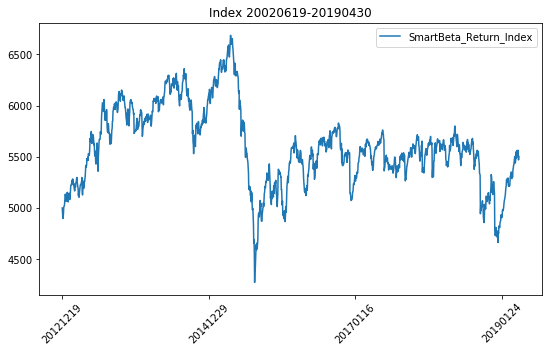

In [60]:
# 繪圖
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = return_df_index['Date']
ax1.plot(np.arange(len(Date)),return_df_index['SmartBeta_Return_Index'],label='SmartBeta_Return_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index 20020619-20190430")

plt.legend()
plt.show()

In [61]:
return_df_index[1470:1475]

,SmartBeta_Return_Index,Date
1470,5208.465620,20181212
1471,5257.745162,20181213
1472,5219.826582,20181214
1473,5182.401613,20181217
1474,5141.286082,20181218


### 回到加權指數

In [62]:
df_index = pd.DataFrame()
df_index['SmartBeta_Index'] = index_list
df_index['Date']   = index_date_list

In [63]:
# checkpoint
# 以表格方式呈現指數的表現
df_index

,SmartBeta_Index,Date
0,5000.000000,20121219
1,4949.757542,20121220
2,4897.424331,20121221
3,4918.368784,20121222
4,4941.078571,20121224
5,5009.868105,20121225
6,5014.127826,20121226
7,5022.898801,20121227
8,5044.039358,20121228
9,5096.319451,20130102


In [64]:
df_index = df_index[:1475]

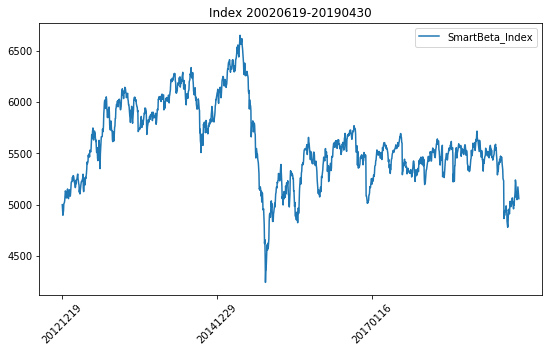

In [65]:
# 繪圖
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index['Date']
ax1.plot(np.arange(len(Date)),df_index['SmartBeta_Index'],label='SmartBeta_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index 20020619-20190430")

plt.legend()
plt.show()

## 匯出SmartBeta

In [66]:
# 建立證券代碼和簡稱的list
SmartBeta_name_list = []
SmartBeta_code_list = []
# 產生等長於 index_list 的內容
for i in range(len(index_list)):
    SmartBeta_name_list.append("高息低波臺灣中型30指數")
    SmartBeta_code_list.append("SmartBeta")

In [67]:
# 加入 df_index 中
#       Date       =>  年月日
# SmartBeta_index  =>  收盤價
SB_index = pd.DataFrame()
SB_index['證券代碼'] = SmartBeta_code_list
SB_index['簡稱'] = SmartBeta_name_list
SB_index['年月日']   = index_date_list
SB_index['收盤價'] = index_list

In [68]:
# checkpoint
# 在匯出前先檢查資料呈現是否符合預期
SB_index

,證券代碼,簡稱,年月日,收盤價
0,SmartBeta,高息低波臺灣中型30指數,20121219,5000.000000
1,SmartBeta,高息低波臺灣中型30指數,20121220,4949.757542
2,SmartBeta,高息低波臺灣中型30指數,20121221,4897.424331
3,SmartBeta,高息低波臺灣中型30指數,20121222,4918.368784
4,SmartBeta,高息低波臺灣中型30指數,20121224,4941.078571
5,SmartBeta,高息低波臺灣中型30指數,20121225,5009.868105
6,SmartBeta,高息低波臺灣中型30指數,20121226,5014.127826
7,SmartBeta,高息低波臺灣中型30指數,20121227,5022.898801
8,SmartBeta,高息低波臺灣中型30指數,20121228,5044.039358
9,SmartBeta,高息低波臺灣中型30指數,20130102,5096.319451


### 匯成csv

In [69]:
# 為解決中文亂碼問題，在to_csv參數加上 encoding="utf_8_sig" 改變編碼
SB_index.to_csv('SmartBeta.csv',index=False,encoding="utf_8_sig")

### 匯成txt

In [70]:
print('證券代碼', '  ' , '簡稱', '  '  '年月日' , '  ' , '收盤價' , file=open('SmartBeta.txt', 'w'))
for i in range(len(index_list)):
    print(SB_index['證券代碼'][i] , '  ' , SB_index['簡稱'][i] , '  ' , SB_index['年月日'][i] , '  ' , SB_index['收盤價'][i] , file=open('SmartBeta.txt', 'a'))

# 四、指數績效測試

## 「特選高股息指數」指數績效測試

In [71]:
#匯入參考指數資料
df_TWSE=pd.read_csv('./Data/TWSE.txt',sep='\t',engine='python')

In [72]:
#整理參考指數資料
df_TWSE = df_TWSE.pivot(index='年月日', columns='證券代碼', values='收盤價')
df_TWSE['年月日'] = df_TWSE.index
df_TWSE = df_TWSE.reset_index(drop=True)
df_TWSE =  df_TWSE.dropna().reset_index(drop=True)

In [73]:
#合併Smartbeta指數及參考指數資料
df_index_TWSE = pd.merge(left=df_index,right=df_TWSE,left_on=['Date'],right_on=['年月日'],how='left')
df_index_TWSE.columns = df_index_TWSE.columns.str.replace(' ','')
df_index_TWSE = df_index_TWSE.dropna()

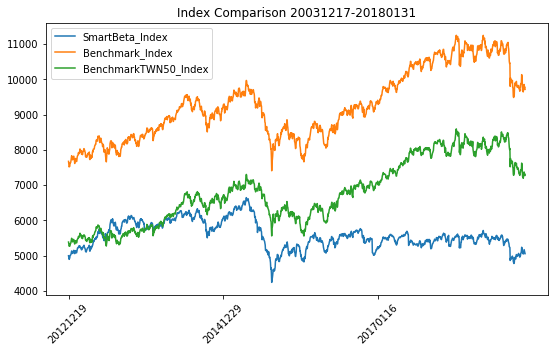

In [74]:
# 繪圖
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_TWSE['Date']
ax1.plot(np.arange(len(Date)),df_index_TWSE['SmartBeta_Index'],label='SmartBeta_Index')
ax1.plot(np.arange(len(Date)),df_index_TWSE['Y9999'],label='Benchmark_Index')
ax1.plot(np.arange(len(Date)),df_index_TWSE['TWN50'],label='BenchmarkTWN50_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index Comparison 20031217-20180131")

plt.legend()
plt.show()

#https://stackoverflow.com/questions/50128668/change-the-tick-frequency-when-value-of-x-axis-is-string
#解決太多ticks

## 「台灣中型指數」指數績效測試

In [75]:
#匯入參考指數資料
df_TM100=pd.read_csv('./Data/TM100.txt',sep='\t',engine='python')

In [76]:
#整理參考指數資料
df_TM100 = df_TM100.pivot(index='年月日', columns='證券代碼', values='收盤價')
df_TM100['年月日'] = df_TM100.index
df_TM100 = df_TM100.reset_index(drop=True)
df_TM100 =  df_TM100.dropna().reset_index(drop=True)

In [77]:
#合併Smartbeta指數及參考指數資料
df_index_TM100 = pd.merge(left=df_index,right=df_TM100,left_on=['Date'],right_on=['年月日'],how='left')
df_index_TM100.columns = df_index_TM100.columns.str.replace(' ','')
df_index_TM100 = df_index_TM100.dropna()

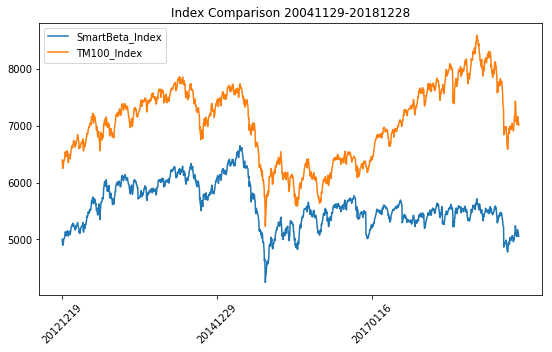

In [78]:
# 繪圖
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_TM100['Date']
ax1.plot(np.arange(len(Date)),df_index_TM100['SmartBeta_Index'],label='SmartBeta_Index')
ax1.plot(np.arange(len(Date)),df_index_TM100['TM100'],label='TM100_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index Comparison 20041129-20181228")

plt.legend()
plt.show()


## 「台灣高股息指數」指數績效測試

In [79]:
#匯入參考指數資料
df_TF001 = pd.read_csv('./Data/TF001.txt',sep='\t',engine='python')

In [80]:
#整理參考指數資料
df_TF001 = df_TF001.pivot(index='年月日', columns='證券代碼', values='收盤價')
df_TF001['年月日'] = df_TF001.index
df_TF001 = df_TF001.reset_index(drop=True)
df_TF001 =  df_TF001.dropna().reset_index(drop=True)

In [81]:
#合併Smartbeta指數及參考指數資料
df_index_TF001 = pd.merge(left=df_index,right=df_TF001,left_on=['Date'],right_on=['年月日'],how='left')
df_index_TF001.columns = df_index_TF001.columns.str.replace(' ','')
df_index_TF001 = df_index_TF001.dropna()

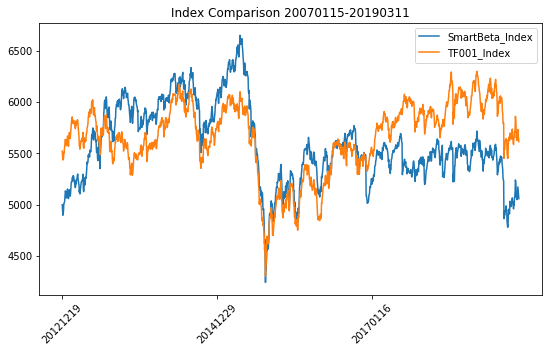

In [82]:
# 繪圖
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_TF001['Date']
ax1.plot(np.arange(len(Date)),df_index_TF001['SmartBeta_Index'],label='SmartBeta_Index')
ax1.plot(np.arange(len(Date)),df_index_TF001['TF001'],label='TF001_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index Comparison 20070115-20190311")

plt.legend()
plt.show()


## 「中小精選50」指數績效測試

In [83]:
#匯入參考指數資料
df_SMC50 = pd.read_csv('./Data/SMC50.txt',sep='\t',engine='python')

In [84]:
#整理參考指數資料
df_SMC50 = df_SMC50.pivot(index='年月日', columns='證券代碼', values='收盤價')
df_SMC50['年月日'] = df_SMC50.index
df_SMC50 = df_SMC50.reset_index(drop=True)
df_SMC50 =  df_SMC50.dropna().reset_index(drop=True)

In [85]:
#合併Smartbeta指數及參考指數資料
df_index_SMC50 = pd.merge(left=df_index,right=df_SMC50,left_on=['Date'],right_on=['年月日'],how='left')
df_index_SMC50.columns = df_index_SMC50.columns.str.replace(' ','')
df_index_SMC50 = df_index_SMC50.dropna()

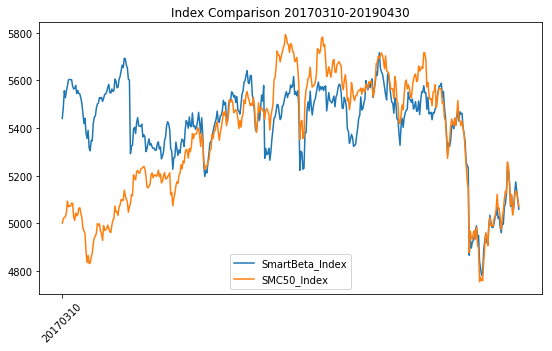

In [86]:
# 繪圖
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_SMC50['Date']
ax1.plot(np.arange(len(Date)),df_index_SMC50['SmartBeta_Index'],label='SmartBeta_Index')
ax1.plot(np.arange(len(Date)),df_index_SMC50['SMC50'],label='SMC50_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index Comparison 20170310-20190430")

plt.legend()
plt.show()


## 「低波精選30指數」指數績效測試

In [87]:
#匯入參考指數資料
df_LV30 = pd.read_csv('./Data/LV30.txt',sep='\t',engine='python')

In [88]:
#整理參考指數資料
df_LV30 = df_LV30.pivot(index='年月日', columns='證券代碼', values='收盤價')
df_LV30['年月日'] = df_LV30.index
df_LV30 = df_LV30.reset_index(drop=True)
df_LV30 =  df_LV30.dropna().reset_index(drop=True)

In [89]:
#合併Smartbeta指數及參考指數資料
df_index_LV30 = pd.merge(left=df_index,right=df_LV30,left_on=['Date'],right_on=['年月日'],how='left')
df_index_LV30.columns = df_index_LV30.columns.str.replace(' ','')
df_index_LV30 = df_index_LV30.dropna()

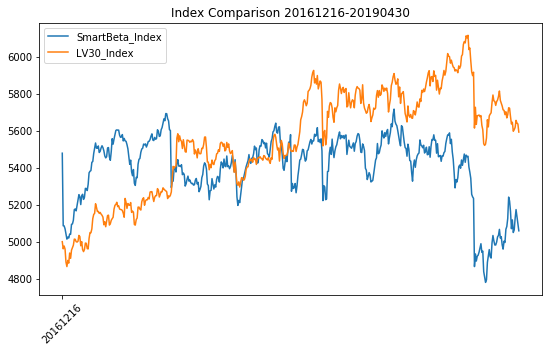

In [90]:
# 繪圖
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_LV30['Date']
ax1.plot(np.arange(len(Date)),df_index_LV30['SmartBeta_Index'],label='SmartBeta_Index')
ax1.plot(np.arange(len(Date)),df_index_LV30['LV30'],label='LV30_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index Comparison 20161216-20190430")

plt.legend()
plt.show()


# 未整理

In [91]:
df_index_TWSE['index_return'] = df_index_TWSE['SmartBeta_Index']/df_index_TWSE['SmartBeta_Index'].shift(1)  
df_index_TWSE['index_return_cum'] = df_index_TWSE['index_return'].cumprod()
df_index_TWSE['benchmark_return'] = df_index_TWSE['Y9999']/df_index_TWSE['Y9999'].shift(1) 
df_index_TWSE['benchmark_return_cum'] = df_index_TWSE['benchmark_return'].cumprod()
df_index_TWSE['benchmark0050_return'] = df_index_TWSE['TWN50']/df_index_TWSE['TWN50'].shift(1) 
df_index_TWSE['benchmark0050_return_cum'] = df_index_TWSE['benchmark0050_return'].cumprod()

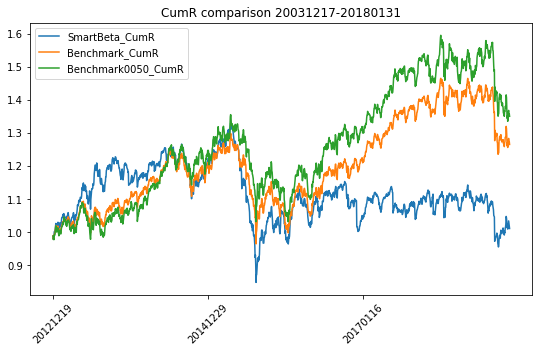

In [92]:
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_TWSE['Date']
ax1.plot(np.arange(len(Date)),df_index_TWSE['index_return_cum'],label='SmartBeta_CumR')
ax1.plot(np.arange(len(Date)),df_index_TWSE['benchmark_return_cum'],label='Benchmark_CumR')
ax1.plot(np.arange(len(Date)),df_index_TWSE['benchmark0050_return_cum'],label='Benchmark0050_CumR')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("CumR comparison 20031217-20180131")

plt.legend()
plt.show()

#https://stackoverflow.com/questions/50128668/change-the-tick-frequency-when-value-of-x-axis-is-string
#解決太多ticks

In [93]:
df_index_TWSE.describe()

,SmartBeta_Index,Date,TWN50,Y9999,年月日,index_return,index_return_cum,benchmark_return,benchmark_return_cum,benchmark0050_return,benchmark0050_return_cum
count,1475.000000,1.475000e+03,1475.000000,1475.000000,1.475000e+03,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,5582.208911,2.015531e+07,6786.654434,9261.848068,2.015531e+07,1.000050,1.116521,1.000193,1.206507,1.000247,1.259691
std,389.801479,1.720287e+04,912.631907,978.813946,1.720287e+04,0.009148,0.077928,0.008100,0.127422,0.009252,0.169295
min,4243.827192,2.012122e+07,5269.960000,7410.340000,2.012122e+07,0.928416,0.848765,0.936875,0.965206,0.935786,0.978036
25%,5329.105252,2.014062e+07,6031.710000,8442.840000,2.014062e+07,0.995500,1.066157,0.996276,1.099802,0.995435,1.119685
50%,5530.039014,2.015122e+07,6723.480000,9159.070000,2.015122e+07,1.000663,1.106037,1.000611,1.193084,1.000386,1.247823
75%,5858.148741,2.017063e+07,7564.905000,9939.260000,2.017063e+07,1.005104,1.171750,1.005004,1.294732,1.005807,1.404646
max,6648.900021,2.018122e+07,8598.640000,11253.110000,2.018122e+07,1.036367,1.329780,1.035801,1.465732,1.045447,1.595795


### 匯出13~18指數（報酬指數）

In [94]:
# 建立證券代碼和簡稱的list
Remuneration_name_list = []
Remuneration_code_list = []
# 產生等長於 return_index_list 的內容
for i in range(len(return_index_list)):
    Remuneration_name_list.append("高息低波臺灣中型30指數")
    Remuneration_code_list.append("SmartBeta")

In [95]:
# 加入 df_index 中
#       Date       =>  年月日
# SmartBeta_index  =>  收盤價
Remuneration_index = pd.DataFrame()
Remuneration_index['證券代碼'] = Remuneration_code_list
Remuneration_index['簡稱'] = Remuneration_name_list
Remuneration_index['年月日']   = return_index_date_list
Remuneration_index['收盤價'] = return_index_list

* 匯出csv

In [96]:
# 為解決中文亂碼問題，在to_csv參數加上 encoding="utf_8_sig" 改變編碼
Remuneration_index.to_csv('SmartBeta_1318.csv',index=False,encoding="utf_8_sig")

* 匯出txt

In [97]:
print('證券代碼', '  ' , '簡稱', '  '  '年月日' , '  ' , '收盤價' , file=open('SmartBeta_1318.txt', 'w'))
for i in range(len(return_index_list)):
    print(Remuneration_index['證券代碼'][i] , '  ' , Remuneration_index['簡稱'][i] , '  ' , Remuneration_index['年月日'][i] , '  ' , Remuneration_index['收盤價'][i] , file=open('SmartBeta_1318.txt', 'a'))